**1. Import libraries**

In [ ]:
# Import necessary libraries
# numpy for numerical operations
# pandas for data manipulation
# matplotlib and seaborn for data visualization
# train_test_split for splitting the dataset into training and testing sets
# DecisionTreeRegressor and DecisionTreeClassifier for the Decision Tree algorithm
# mean_squared_error, accuracy_score, and confusion_matrix for evaluating the models

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

**2. Load the dataset**

In [ ]:
# Read CSV
data = pd.read_csv('./sample_data/owid-covid-data.csv')

**3. Preprocess the data**

In [ ]:
# Remove rows with missing values in the columns we're interested in
data = data.dropna(subset=['new_cases', 'new_deaths', 'population_density', 'gdp_per_capita', 'median_age'])

# Create a new binary column 'death_increase' indicating whether there is an increase in new deaths
data['death_increase'] = (data['new_deaths'] > 0).astype(int)

# Select relevant features for prediction: 'population_density', 'gdp_per_capita', and 'median_age'
features = ['population_density', 'gdp_per_capita', 'median_age']
X = data[features]

# Select target variables for regression and classification tasks
y_linear = data['new_cases']
y_logistic = data['death_increase']

<ipython-input-12-f915a9150a8d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['death_increase'] = (data['new_deaths'] > 0).astype(int)


**4. Split the data into training and testing sets**

In [ ]:
# Split the dataset into training (70%) and testing (30%) sets for both regression and classification tasks
X_train, X_test, y_train_linear, y_test_linear, y_train_logistic, y_test_logistic = train_test_split(X, y_linear, y_logistic, test_size=0.3, random_state=42)

**5. Train and evaluate the Decision Tree Regression model**




In [ ]:
# Initialize a DecisionTreeRegressor with the default criterion 'mse'
dt_regressor = DecisionTreeRegressor()

# Fit the regressor to the training data
dt_regressor.fit(X_train, y_train_linear)

# Make predictions on the testing data
y_pred_linear = dt_regressor.predict(X_test)

# Calculate the Mean Squared Error to evaluate the regression model's performance
mse = mean_squared_error(y_test_linear, y_pred_linear)
print("Mean Squared Error:", mse)

Mean Squared Error: 3013326410.1989546


**6. Train and evaluate the Decision Tree Classification model**


In [ ]:
# Initialize a DecisionTreeClassifier with the default criterion 'gini'
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train_logistic)

# Make predictions on the testing data
y_pred_logistic = dt_classifier.predict(X_test)

# Calculate the accuracy score to evaluate the classification model's performance
accuracy = accuracy_score(y_test_logistic, y_pred_logistic)
print("Accuracy:", accuracy)

# Calculate the confusion matrix to further evaluate the classification model
conf_matrix = confusion_matrix(y_test_logistic, y_pred_logistic)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8035108992201063
Confusion Matrix:
 [[ 9651  4214]
 [ 2916 19506]]


**7. Visualize the results**

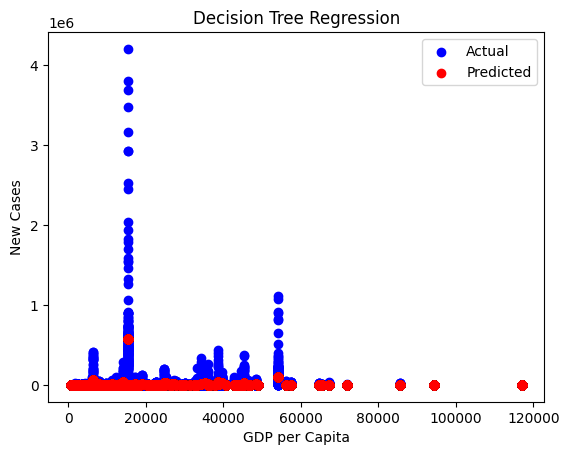

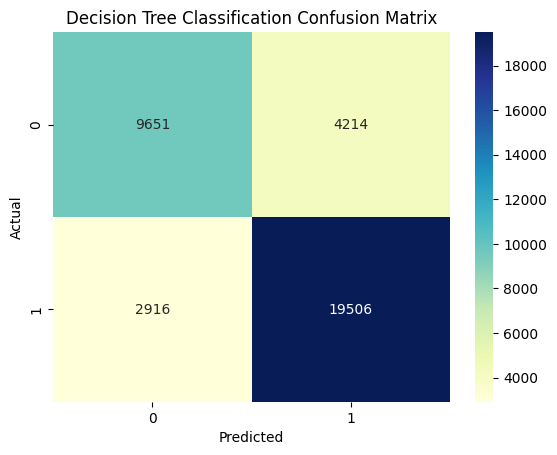

In [ ]:
# Plot the actual vs. predicted new cases for the Decision Tree Regression model
plt.scatter(X_test['gdp_per_capita'], y_test_linear, color='blue', label='Actual')
plt.scatter(X_test['gdp_per_capita'], y_pred_linear, color='red', label='Predicted')
plt.xlabel('GDP per Capita')
plt.ylabel('New Cases')
plt.legend()
plt.title('Decision Tree Regression')
plt.show()

# Plot the confusion matrix for the Decision Tree Classification model
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Classification Confusion Matrix')
plt.show()

In this example, we used the Decision Tree algorithm for both regression and classification tasks on your dataset. The Decision Tree algorithm works by recursively splitting the dataset into subsets based on the feature values, and then making predictions based on the majority class or the average target value in each leaf node.

For the regression task, we used the DecisionTreeRegressor class with the default mean squared error (MSE) criterion for splitting the dataset. The model performance was evaluated using the mean squared error metric.

For the classification task, we used the DecisionTreeClassifier class with the default Gini impurity criterion for splitting the dataset. The model performance was evaluated using the accuracy score and confusion matrix